<a href="https://colab.research.google.com/github/sachitanand193/Sachit_projects/blob/main/uber_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
df=pd.read_csv('/uber-raw-data-aug14.csv')

In [ ]:
df.shape

(91654, 4)

In [ ]:
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [ ]:
clus=df[['Lat','Lon']]

In [ ]:
clus.dtypes

Lat    float64
Lon    float64
dtype: object

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

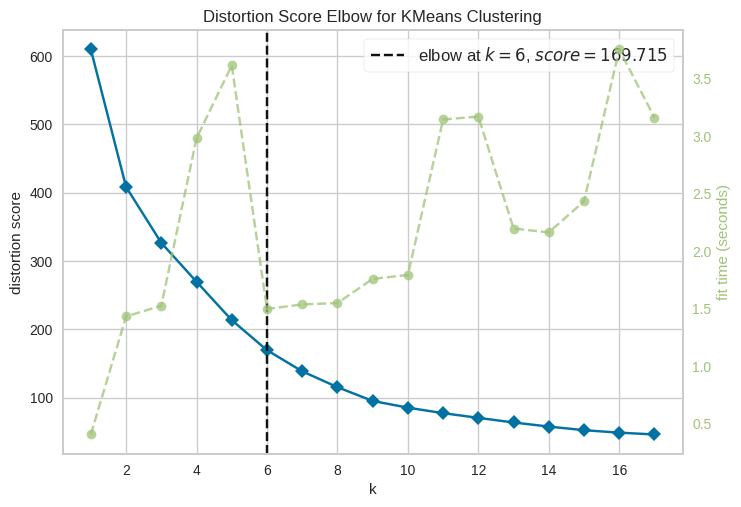

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 18))
visualizer.fit(clus)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(clus)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 40.71669043, -73.99052612],
       [ 40.66969249, -73.75143274],
       [ 40.76281941, -73.9768559 ],
       [ 40.17892857, -74.04205048],
       [ 40.71355814, -74.20725234],
       [ 40.80179821, -73.87341177]])

In [ ]:
clocation = pd.DataFrame(centroids, columns = ['Latitude', 'Longitude'])

In [ ]:
clocation.head()

,Latitude,Longitude
0,40.716690,-73.990526
1,40.669692,-73.751433
2,40.762819,-73.976856
3,40.178929,-74.042050
4,40.713558,-74.207252


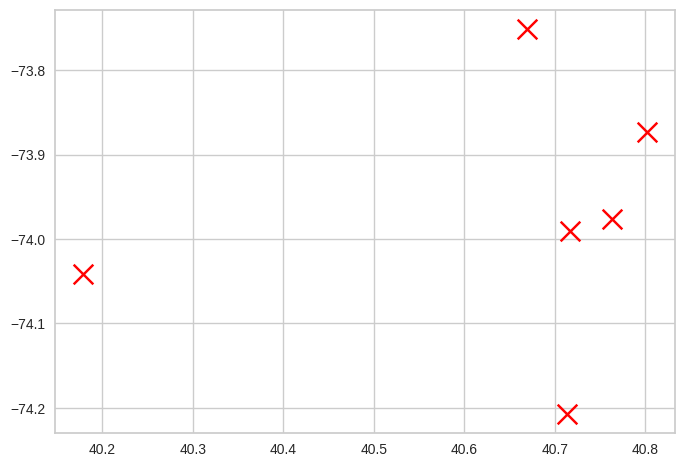

In [ ]:
plt.scatter(clocation['Latitude'], clocation['Longitude'], marker = "x", c = 'Red', s = 200)

In [ ]:
import folium
centroid = clocation.values.tolist()

map = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)

map

In [ ]:
label = kmeans.labels_
label

array([0, 0, 0, ..., 0, 5, 1], dtype=int32)

In [ ]:
data_new = df.copy()
data_new['Clusters'] = label
data_new

,Date/Time,Lat,Lon,Base,Clusters
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,0
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,0
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,0
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,0
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,0
...,...,...,...,...,...
91649,8/8/2014 15:35:00,40.7613,-73.9916,B02598,2
91650,8/8/2014 15:35:00,40.7557,-73.9752,B02598,2
91651,8/8/2014 15:35:00,40.6735,-73.9895,B02598,0
91652,8/8/2014 15:35:00,40.7688,-73.8624,B02598,5


In [ ]:
pip install -U seaborn

In [ ]:
pip install seaborn --upgrade

In [ ]:
count_3=0
count_0=0
count_1=0
count_2=0
count_4=0
count_5=0
for value in data_new['Clusters']:
    if value == 0:
        count_0 += 1
    if value == 1:
        count_1 += 1
    if value == 2:
      count_2+=1
    if value==3:
      count_3+=1
    if value==4:
      count_4+=1
    if value==5:
      count_5+=1
print(count_0, count_1,count_2,count_3,count_4,count_5)

40946 3155 41088 210 1431 4824


In [ ]:
new_location = [(40.86, -75.56)]
kmeans.predict(new_location)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)